# <center><font color=maroon>CPE4903 Project: Cats and Dogs Classifier</font> </center>

### In this mini-project, you will develop a CNN model for the cat-and-dog classifer. 
#### You will create `at least two models`, applying the various techniques we discussed for improving the performance. 

1. Deeper Conv layers and/or FC layers
2. Image augmentation
3. Transfer learning
4. Regularization
5. Increasing image size
6. Increasing size of the train/validation/test dataset

* You will compare the performance of your models with the baseline VGG-5 model.  
* <font color=red>Performance requirement: the accuracy on the test data needs to be better than 85% for at least one of your models </font>
* You will save the parameters of the model at the end, which will be deployed on Raspberry Pi.

### Cats & Dogs Dataset

* #### You are given a zip file, `train.zip`, that contains 25,000 labelled images of cats and dogs (12,500 each) 
* #### You will select a subset of $N$ image files from the dataset and store them in the following sub-directory structure, where $N$ can be anywhere between 6,000 to 25,000.
* #### The train-validation-test data split is 60%-15%-25%.
<img src="./images/train_test_dir.png" alt="Drawing" style="width: 200px;"/> 

### Load tool modules

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

### Load CNN models

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.datasets import mnist


### Load the image processing tools 

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generators with some image augmentation for the training data
# and only rescaling for the validation and test data
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set the directory paths for training, testing, and validation datasets
train_dir = r'C:\CAT - DOG\train'  # The path to the training data
test_dir = r'C:\CAT - DOG\test'    # The path to the testing data
valid_dir = r'C:\CAT - DOG\valid'  # The path to the validation data

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 15000 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


### Load and Process the dataset
__Create the subdirectory structures per the requirement.__

### Display 2 input images: one for dog, and one for cat 

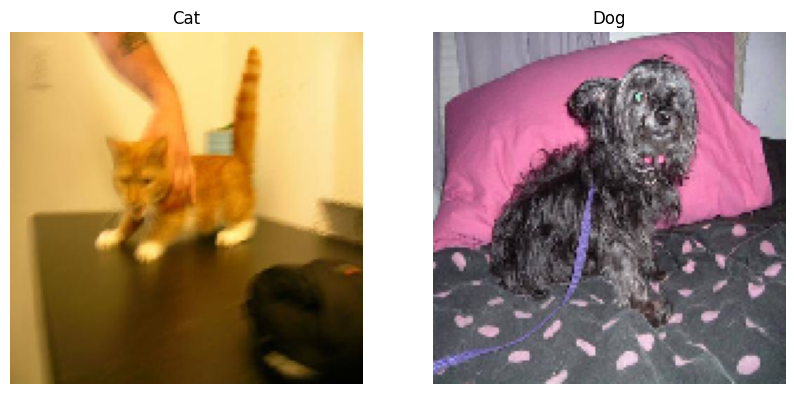

In [32]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Base directory where your dataset is stored
base_dir = r'C:\CAT - DOG'  # Use a raw string for Windows paths

# Specific paths to a cat and a dog image
cat_image_path = os.path.join(base_dir, 'train', 'cats', 'cat.0.jpg')  # Assuming 'cat.0.jpg' is the correct filename
dog_image_path = os.path.join(base_dir, 'train', 'dogs', 'dog.0.jpg')  # Assuming 'dog.0.jpg' is the correct filename

# Load the images
cat_img = load_img(cat_image_path, target_size=(150, 150))
dog_img = load_img(dog_image_path, target_size=(150, 150))

# Convert images to array for displaying
cat_img = img_to_array(cat_img)
dog_img = img_to_array(dog_img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cat_img / 255)  # Normalize the pixel values for displaying
plt.title('Cat')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_img / 255)  # Normalize the pixel values for displaying
plt.title('Dog')
plt.axis('off')

plt.show()


# <font color=blue>Build CNN Model One</font>

## <font color=green>Define the CNN model</font> 

__Use CONV, POOL and FC layers to construct your CNN model. You can also load pre-trained model, if transfer learning is used. You will train and test the model after this step.__

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First CONV => RELU => POOL layer set
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    # Second CONV => RELU => POOL layer set
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third CONV => RELU => POOL layer set
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Fourth CONV => RELU => POOL layer set
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flatten the input to feed into the DNN
    Flatten(),
    
    # First FC (Dense) Layer
    Dense(512, activation='relu'),
    
    # Add Dropout
    Dropout(0.5),
    
    # Output layer with a single neuron for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



### Print the model summary that shows the output shape and # of parameters for each layer.

In [34]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### <font color=red>Question: What are the total number of parameters for the model?</font>

**Total params: 3453121


## <font color=green>Train the CNN Model</font>

__Note: Display the history when running model.fit( )__

In [49]:
import time
start_time = time.time()

# Assuming you have already defined 'train_datagen' for training data augmentation
# For validation data, we usually do not apply augmentation, just rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming your validation data is in the directory 'cat-dog/valid'
validation_dir = 'C:\CAT - DOG/valid'  # Replace with your actual path

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Same target size as train_generator
    batch_size=32,  # Same batch size as train_generator if possible
    class_mode='binary'  # Assuming binary classification (cat vs dog)
)


history = model.fit(
    train_generator,
    steps_per_epoch=100,  # adjust based on the size of your dataset
    epochs=25,  # adjust based on your need
    validation_data=validation_generator,
    validation_steps=50  # adjust based on the size of your validation dataset
)

end_time = time.time()
total_training_time = end_time - start_time
print(f"Total training time is: {total_training_time:.2f} seconds")

# To display the history
print(history.history)


Found 3750 images belonging to 2 classes.
Epoch 1/25
100/100 [==============================] - 36s 364ms/step - loss: 0.4644 - accuracy: 0.7869 - val_loss: 0.4680 - val_accuracy: 0.7750
Epoch 2/25
100/100 [==============================] - 33s 328ms/step - loss: 0.4437 - accuracy: 0.7994 - val_loss: 0.4291 - val_accuracy: 0.7969
Epoch 3/25
100/100 [==============================] - 33s 332ms/step - loss: 0.4617 - accuracy: 0.7844 - val_loss: 0.3760 - val_accuracy: 0.8425
Epoch 4/25
100/100 [==============================] - 34s 338ms/step - loss: 0.4459 - accuracy: 0.7970 - val_loss: 0.4180 - val_accuracy: 0.8025
Epoch 5/25
100/100 [==============================] - 34s 341ms/step - loss: 0.4510 - accuracy: 0.7959 - val_loss: 0.3735 - val_accuracy: 0.8456
Epoch 6/25
100/100 [==============================] - 35s 353ms/step - loss: 0.4402 - accuracy: 0.7859 - val_loss: 0.4321 - val_accuracy: 0.7887
Epoch 7/25
100/100 [==============================] - 36s 361ms/step - loss: 0.4407 - ac

### <font color=red>Question: What is the estimated total model training time?</font>

In [50]:
print(f"Total training time is: {total_training_time:.2f} seconds")



Total training time is: 894.31 seconds


In [67]:
total_training_time_seconds = 894.31
minutes = total_training_time_seconds // 60
seconds = total_training_time_seconds % 60

print(f"Total training time is: {int(minutes)} minutes and {seconds:.2f} seconds")


Total training time is: 14 minutes and 54.31 seconds


### Compare Loss and Accuracy Performance for train and validation data

#### Plot the loss data, for both train and validation data

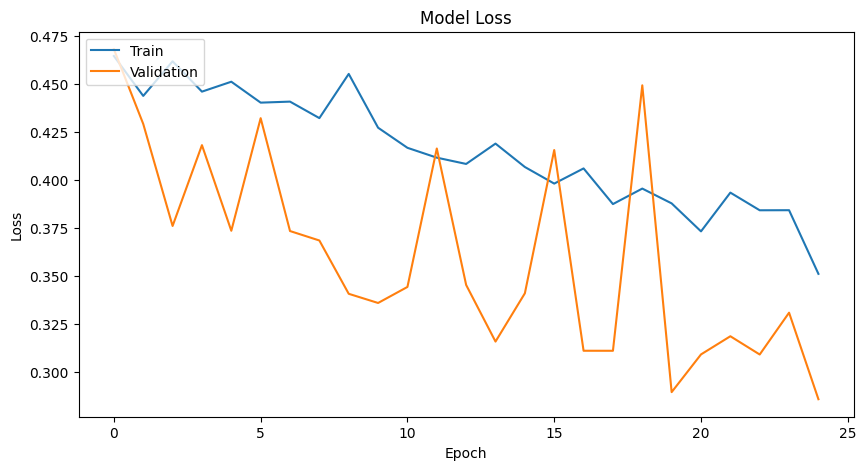

In [52]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Plot the accuracy data, for both train and validation data

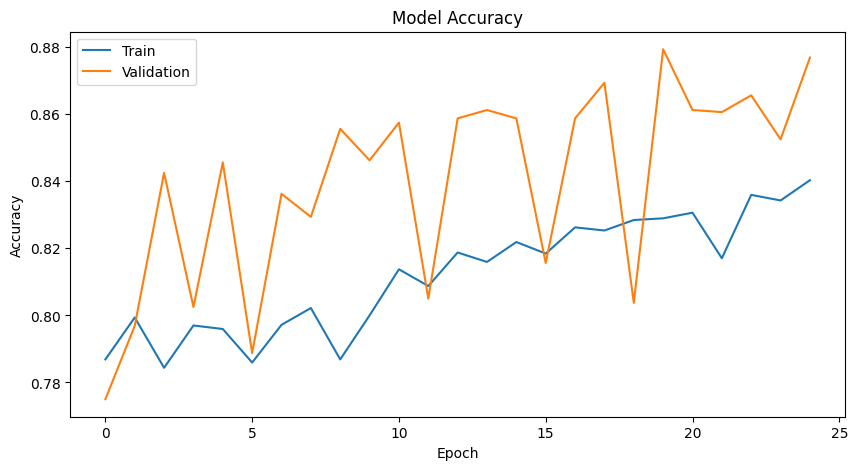

In [53]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## <font color=green>Test the CNN Model</font>
__Note: Display the history when running model.evaluate( )__

In [58]:
# Assuming 'test_generator' is already defined and properly set up
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



195/195 [==============================] - 15s 76ms/step - loss: 0.3178 - accuracy: 0.8627
Test Loss: 0.32
Test Accuracy: 0.86


### <font color=red>Question: What is the estimated inference (testing) time on test dataset?</font>

### Print the final loss and accuracy of the test data

In [60]:
print(f"Test Loss: 0.32")
print(f"Test Accuracy: 0.86")


Test Loss: 0.32
Test Accuracy: 0.86


### Save the CNN model parameters

In [62]:
model.save(r'C:\CAT - DOG\cats-dogs.keras')  # Save the model in the recommended K


# <font color=blue>Build CNN Model Two</font>

__For your second and subsequent models, follow the same set of instructions provided for Model One__

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model_two = Sequential()

# First convolutional layer with Batch Normalization
model_two.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_two.add(BatchNormalization())
model_two.add(MaxPooling2D((2, 2)))

# Second convolutional layer with increased filters
model_two.add(Conv2D(128, (3, 3), activation='relu'))
model_two.add(BatchNormalization())
model_two.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model_two.add(Conv2D(256, (3, 3), activation='relu'))
model_two.add(BatchNormalization())
model_two.add(MaxPooling2D((2, 2)))

# Fourth convolutional layer
model_two.add(Conv2D(256, (3, 3), activation='relu'))
model_two.add(BatchNormalization())
model_two.add(MaxPooling2D((2, 2)))

# Flatten the results to feed into dense layers
model_two.add(Flatten())

# 512 neuron hidden layer with Dropout
model_two.add(Dense(512, activation='relu'))
model_two.add(Dropout(0.5))

# Output layer with a single neuron for binary classification
model_two.add(Dense(1, activation='sigmoid'))

# Compile the model
model_two.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# View the architecture of model_two
model_two.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 148, 148, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 128)       512       
 chNormalization)                                                
                                                      

### <font color=red>Question: What are the total number of parameters for the model?</font>

**Total params: 7387265

In [66]:
import time
start_time = time.time()

# Assuming you have already defined 'train_datagen' for training data augmentation
# For validation data, we usually do not apply augmentation, just rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming your validation data is in the directory 'cat-dog/valid'
validation_dir = 'C:\CAT - DOG/valid'  # Replace with your actual path

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Same target size as train_generator
    batch_size=32,  # Same batch size as train_generator if possible
    class_mode='binary'  # Assuming binary classification (cat vs dog)
)

# Assuming you have defined 'model_two' with architecture and compiled it
history_two = model_two.fit(
    train_generator,  # Use your training data generator
    steps_per_epoch=100,  # Adjust based on the size of your dataset
    epochs=25,  # Adjust based on your need
    validation_data=validation_generator,  # Use your validation data generator
    validation_steps=50  # Adjust based on the size of your validation dataset
)

end_time = time.time()
total_training_time = end_time - start_time
print(f"Total training time is: {total_training_time:.2f} seconds")

# To display the history for Model Two
print(history_two.history)


Found 3750 images belonging to 2 classes.
Epoch 1/25
100/100 [==============================] - 126s 1s/step - loss: 2.1700 - accuracy: 0.5475 - val_loss: 0.7176 - val_accuracy: 0.5412
Epoch 2/25
100/100 [==============================] - 120s 1s/step - loss: 0.7623 - accuracy: 0.5631 - val_loss: 0.7106 - val_accuracy: 0.5238
Epoch 3/25
100/100 [==============================] - 117s 1s/step - loss: 0.6737 - accuracy: 0.6006 - val_loss: 0.9094 - val_accuracy: 0.5006
Epoch 4/25
100/100 [==============================] - 115s 1s/step - loss: 0.6572 - accuracy: 0.6241 - val_loss: 0.6297 - val_accuracy: 0.6431
Epoch 5/25
100/100 [==============================] - 100s 1000ms/step - loss: 0.6692 - accuracy: 0.6294 - val_loss: 0.7765 - val_accuracy: 0.5612
Epoch 6/25
100/100 [==============================] - 104s 1s/step - loss: 0.6452 - accuracy: 0.6491 - val_loss: 0.5929 - val_accuracy: 0.6712
Epoch 7/25
100/100 [==============================] - 111s 1s/step - loss: 0.6394 - accuracy: 0.

In [68]:
print(f"Total training time is: {total_training_time:.2f} seconds")



Total training time is: 2749.97 seconds


In [69]:
total_training_time_seconds = 2749.97
minutes = total_training_time_seconds // 60
seconds = total_training_time_seconds % 60

print(f"Total training time is: {int(minutes)} minutes and {seconds:.2f} seconds")


Total training time is: 45 minutes and 49.97 seconds


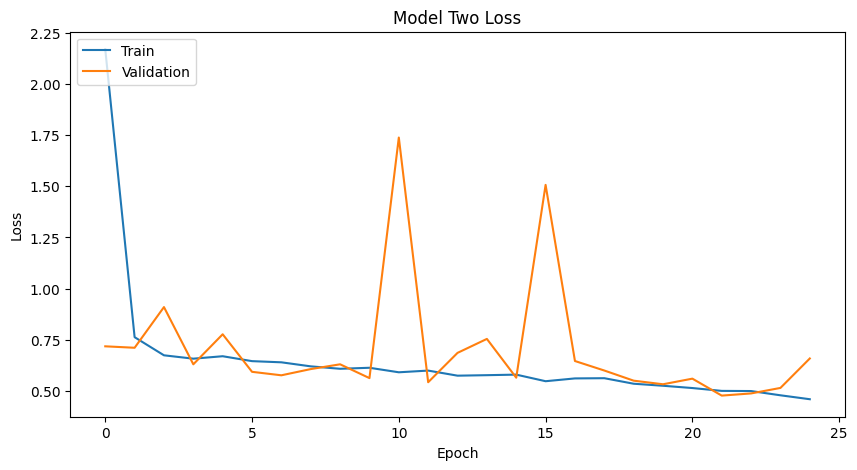

In [70]:
# Plot training & validation loss values for Model Two
plt.figure(figsize=(10, 5))
plt.plot(history_two.history['loss'])
plt.plot(history_two.history['val_loss'])
plt.title('Model Two Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


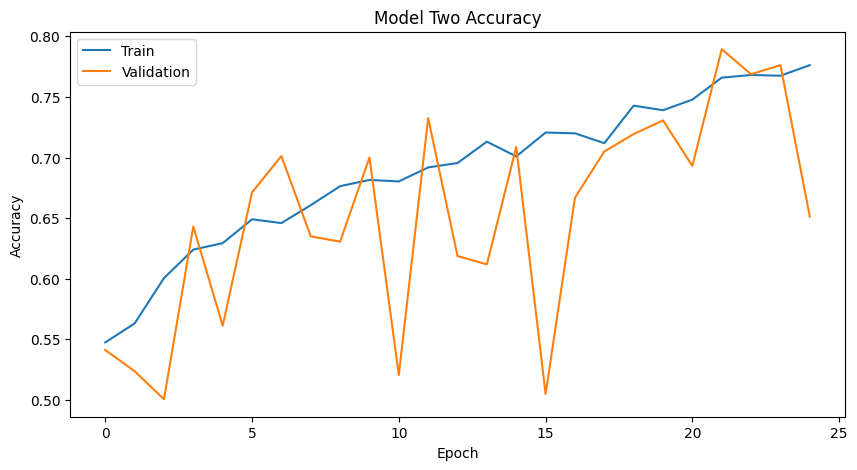

In [71]:
# Plot training & validation accuracy values for Model Two
plt.figure(figsize=(10, 5))
plt.plot(history_two.history['accuracy'])
plt.plot(history_two.history['val_accuracy'])
plt.title('Model Two Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [72]:
# Evaluate Model Two on the test dataset
test_loss_two, test_accuracy_two = model_two.evaluate(test_generator)

# Display the test loss and accuracy
print(f"Test Loss: {test_loss_two:.2f}")
print(f"Test Accuracy: {test_accuracy_two:.2f}")

# To display the history
print(history_two.history)


196/196 [==============================] - 98s 496ms/step - loss: 0.6545 - accuracy: 0.6640
Test Loss: 0.65
Test Accuracy: 0.66
{'loss': [2.1700022220611572, 0.7623193264007568, 0.6736729145050049, 0.6572145819664001, 0.6691750884056091, 0.6451680660247803, 0.6394166350364685, 0.6196867227554321, 0.6078005433082581, 0.6127541065216064, 0.59065842628479, 0.5989911556243896, 0.5741106867790222, 0.5765326023101807, 0.5792146921157837, 0.5470131039619446, 0.560723066329956, 0.561755895614624, 0.5347388982772827, 0.5247915983200073, 0.5136597752571106, 0.49973076581954956, 0.4989575147628784, 0.47819235920906067, 0.45899245142936707], 'accuracy': [0.5475000143051147, 0.5631250143051147, 0.6005638837814331, 0.6240601539611816, 0.6293859481811523, 0.6490625143051147, 0.6459375023841858, 0.6607142686843872, 0.6763784289360046, 0.6815624833106995, 0.6803125143051147, 0.6918749809265137, 0.6954887509346008, 0.7131249904632568, 0.7009375095367432, 0.7206249833106995, 0.7200000286102295, 0.7118750

In [73]:
print(f"Test Loss: 0.65")
print(f"Test Accuracy: 0.66")


Test Loss: 0.65
Test Accuracy: 0.66


In [74]:
model_two.save('C:\CAT - DOG\model_two.keras')

## <font color=green>Conclusion</font>

### You will fill out information in this table:
| Model              | Accuracy | Number of Parameters | Training Time | Inference Speed |
|-------------------- |----------|-----------------------|--------------- |------------------|
| Baseline VGG-5     |          |                       |                |                  |
| Model One       | 0.86     |3,453,121        | 14 minutes and 54.31 second                      |                |                  |
| Model Two       |0.66      | 7,387,265       |  45 minutes and 49.97 seconds                     |                |                  |
| Model Three         |          |                       |                |                  |


__You can also add comments on what you tried and observed while working on the project.__

## <center><font color=maroon>Remember to turn in both the notebook and the pdf version.</font></center>